In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('done!')

done!


In [2]:
db =  pd.read_csv("netflix1.csv")
db.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
db.type.describe()

count      8790
unique        2
top       Movie
freq       6126
Name: type, dtype: object

In [4]:
db.rating.describe()

count      8790
unique       14
top       TV-MA
freq       3205
Name: rating, dtype: object

In [5]:
db[db.isnull()].count()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
db.country.describe()

count              8790
unique               86
top       United States
freq               3240
Name: country, dtype: object

In [7]:
db.date_added = pd.to_datetime(db.date_added)
db.date_added

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: date_added, Length: 8790, dtype: datetime64[ns]

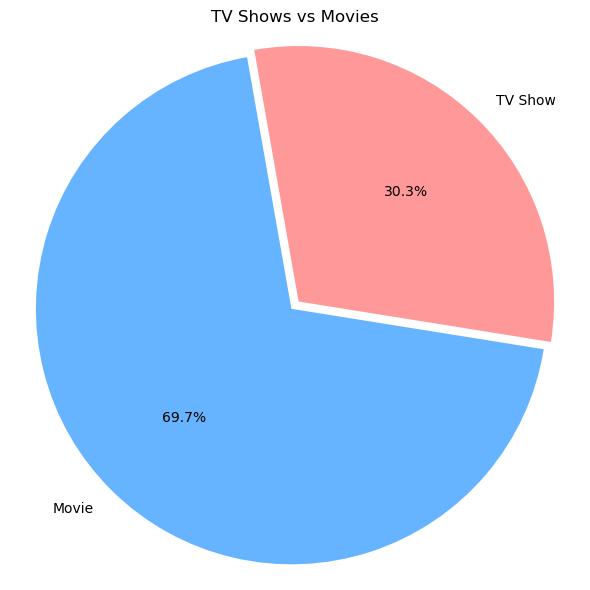

In [8]:
type_counts = db['type'].dropna().value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=100,
    colors=['#66b3ff', '#ff9999'],
    explode=(0.02, 0.02),
)

plt.title('TV Shows vs Movies')
plt.axis('equal')  # Ensures it's a perfect circle
plt.tight_layout()
plt.show()

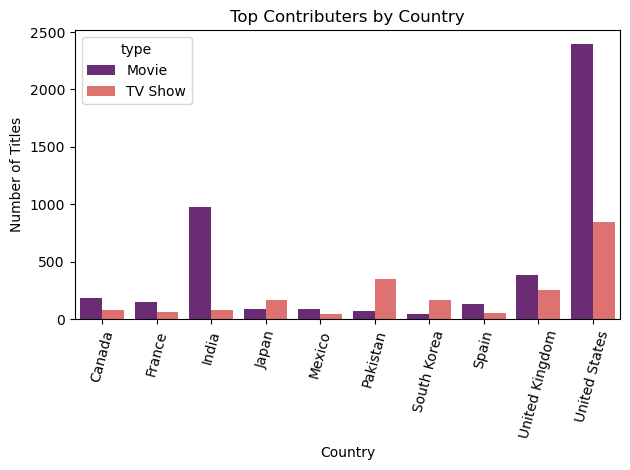

In [9]:
db['country'] = db['country'].replace('Not Given', pd.NA)
db_country = db.dropna(subset=['country'])

most_contribution = (db_country[['country','show_id']]
                     .groupby('country')
                     .count()
                     .nlargest(10, 'show_id')
                     .reset_index()
                    )
bar = db[['country','type','show_id']].groupby(['country','type']).count().reset_index()
bar = bar[bar.country.isin(most_contribution.country)]


sns.barplot(bar, x = "country", y = "show_id", hue="type", palette='magma')
plt.title('Top Contributers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

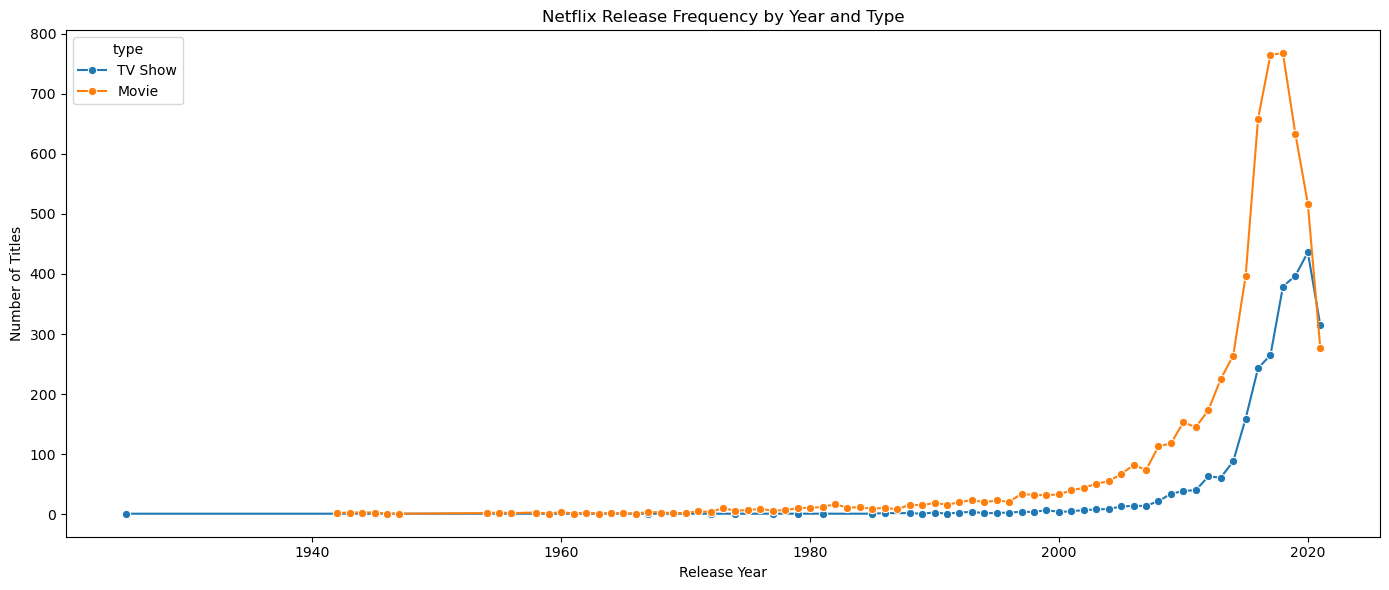

In [10]:
yearly_counts = db.groupby(['release_year', 'type']).size().reset_index(name='count')
yearly_counts = yearly_counts.sort_values('release_year')

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_counts, x='release_year', y='count', hue='type', marker='o')
plt.title('Netflix Release Frequency by Year and Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

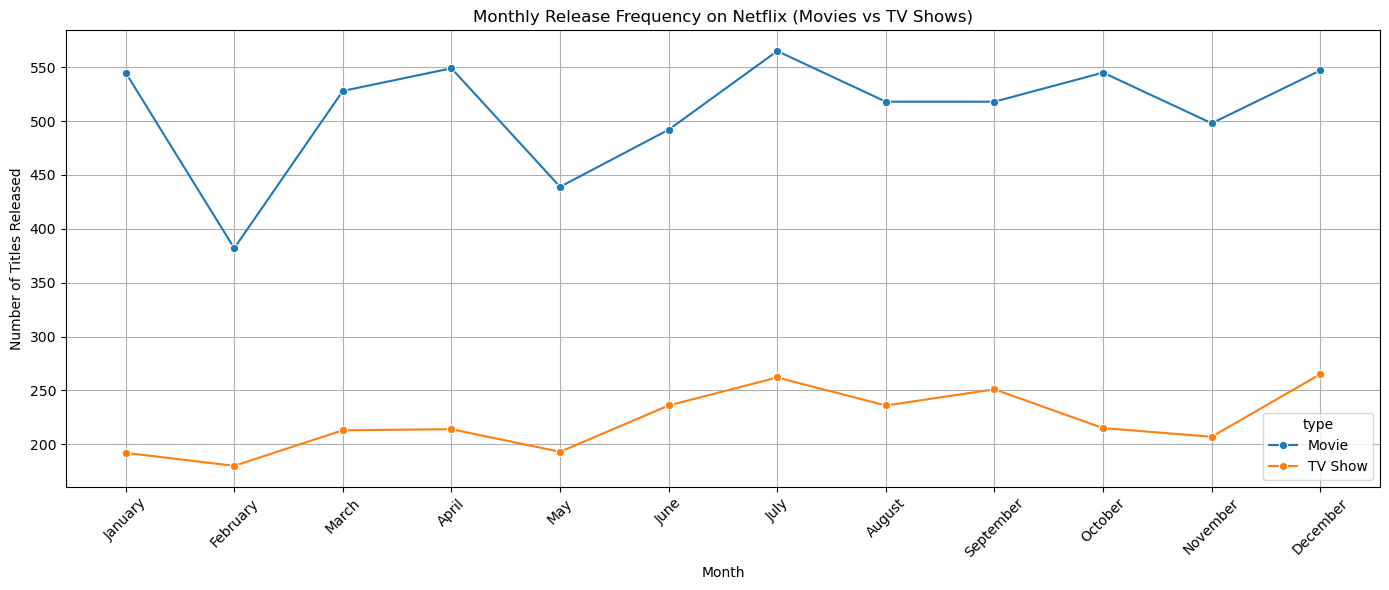

In [11]:
db['month'] = db['date_added'].dt.month_name()

# Optional: Create a categorical month column to preserve order
db['month'] = pd.Categorical(db['month'], categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                             ordered=True)

# Group by month and type
monthly_counts = db.groupby(['month', 'type'], observed=True).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_counts, x='month', y='count', hue='type', marker='o')

plt.title('Monthly Release Frequency on Netflix (Movies vs TV Shows)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

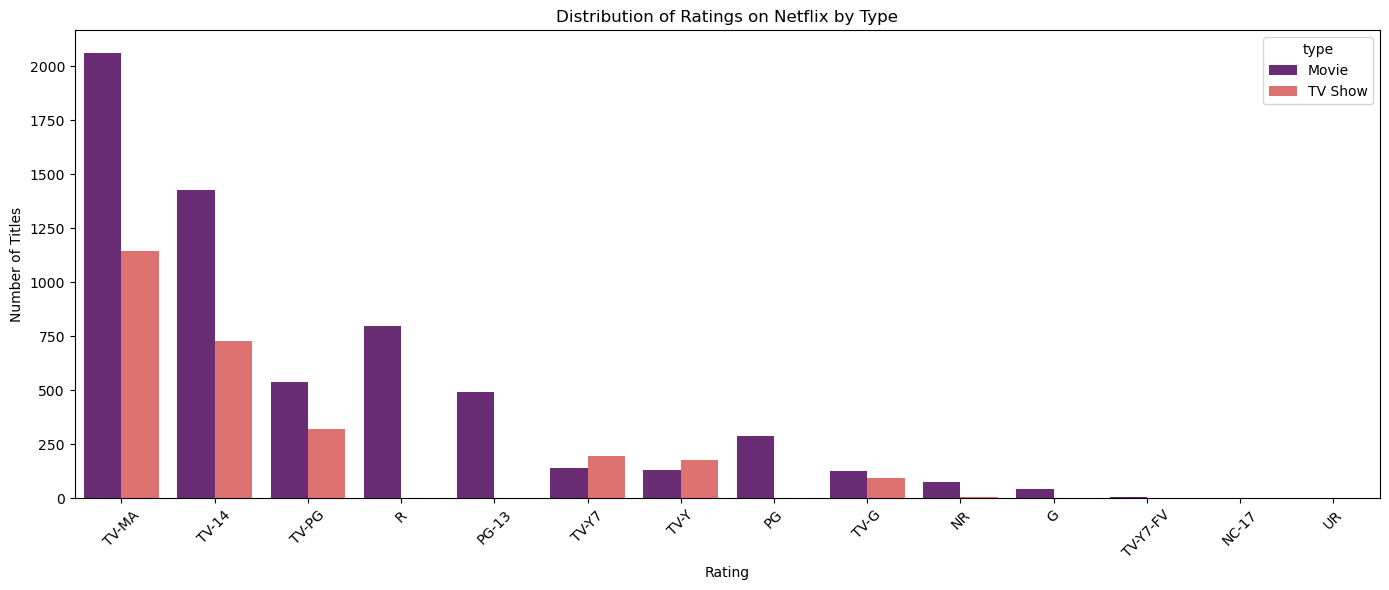

In [12]:
db['rating'] = db['rating'].replace('Not Given', pd.NA)

# Drop rows with missing ratings and types
rating_data = db.dropna(subset=['rating', 'type'])

# Group by rating and type
rating_counts = (
    rating_data.groupby(['rating', 'type'])['show_id']
    .count()
    .reset_index()
    .rename(columns={'show_id': 'count'})
)

# Sort ratings by total count for better visual order
rating_order = (
    rating_counts.groupby('rating')['count']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=rating_counts,
    x='rating',
    y='count',
    hue='type',
    order=rating_order,
    palette='magma'
)

plt.title('Distribution of Ratings on Netflix by Type')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

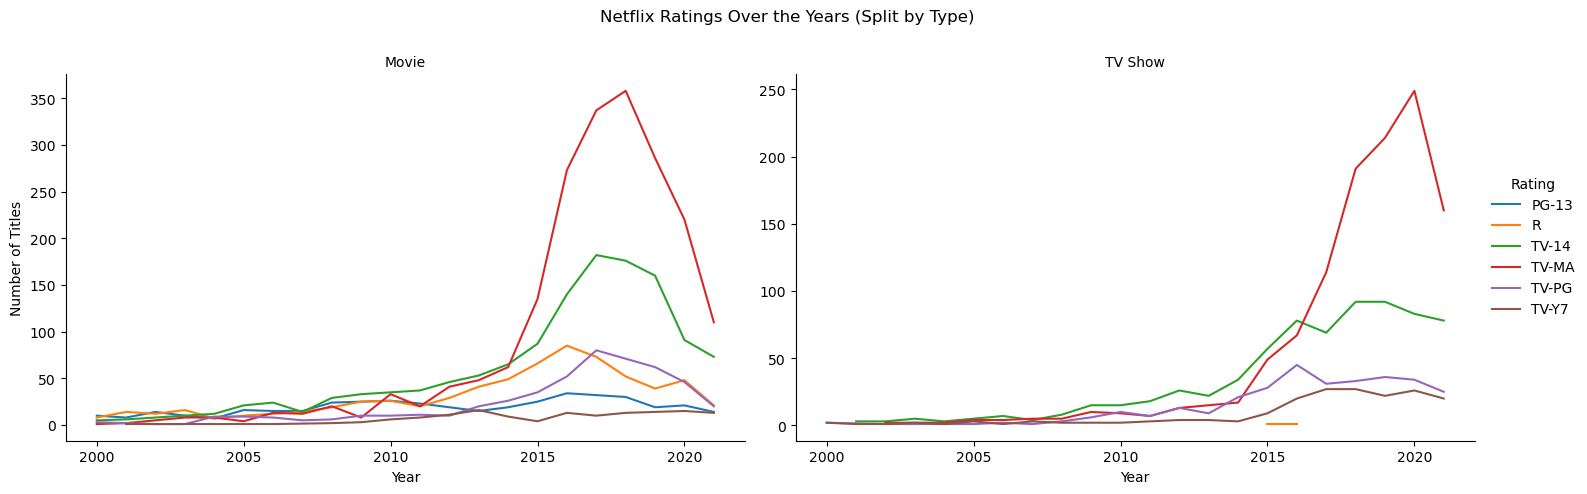

In [13]:
db['rating'] = db['rating'].replace('Not Given', pd.NA)
db['release_year'] = db['release_year'].replace('Not Given', pd.NA)

# Drop missing values
rating_year_data = db.dropna(subset=['rating', 'type', 'release_year'])

# Convert release_year to int if not already
rating_year_data['release_year'] = rating_year_data['release_year'].astype(int)

# Optional: focus on modern years
rating_year_data = rating_year_data[rating_year_data['release_year'] >= 2000]

# Group by year, rating, and type
rating_trends = (
    rating_year_data.groupby(['release_year', 'rating', 'type'])['show_id']
    .count()
    .reset_index()
    .rename(columns={'show_id': 'count'})
)
top_ratings = (
    rating_trends.groupby('rating')['count']
    .sum()
    .nlargest(6)
    .index
)

filtered_trends = rating_trends[rating_trends['rating'].isin(top_ratings)]

# Plot using FacetGrid
g = sns.FacetGrid(
    filtered_trends,
    col='type',
    hue='rating',
    height=5,
    aspect=1.5,
    sharey=False
)

g.map_dataframe(
    sns.lineplot,
    x='release_year',
    y='count'
)

g.add_legend(title='Rating')
g.set_axis_labels("Year", "Number of Titles")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Netflix Ratings Over the Years (Split by Type)")
plt.show()

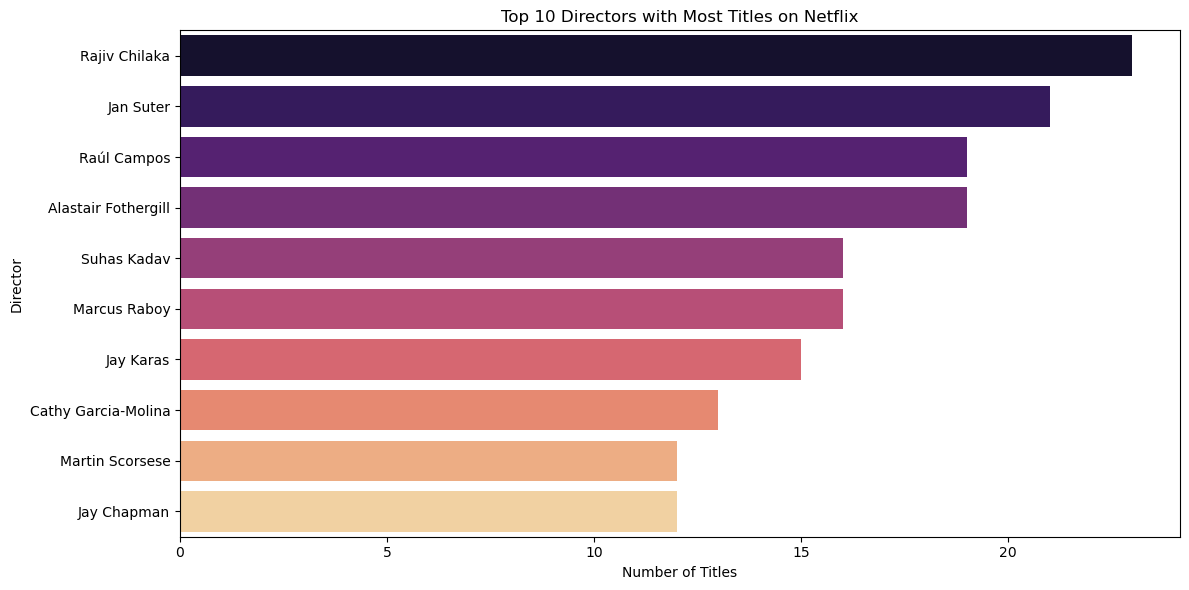

In [14]:
db['director'] = db['director'].replace('Not Given', pd.NA)

# Drop missing directors
db_directors = db.dropna(subset=['director'])

# Split and explode directors safely
db_directors.loc[:, 'director'] = db_directors['director'].str.split(', ')
db_directors = db_directors.explode('director')

# Count top 10 directors
top_directors = (
    db_directors['director']
    .value_counts()
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='count', y='director', palette='magma', hue = 'director', legend=False)

plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

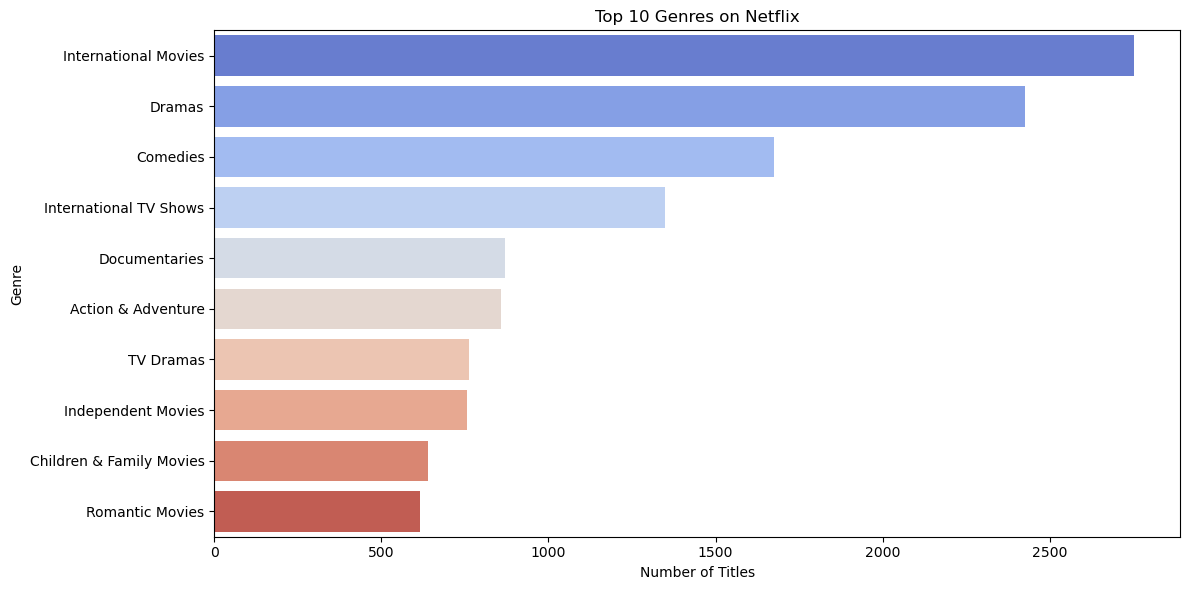

In [15]:
# Replace 'Not Given' with NaN
db['listed_in'] = db['listed_in'].replace('Not Given', pd.NA)

# Drop missing genre entries
db_genres = db.dropna(subset=['listed_in'])

# Split multiple genres and explode
db_genres.loc[:, 'listed_in'] = db_genres['listed_in'].str.split(', ')
db_genres = db_genres.explode('listed_in')

# Count top 10 genres
top_genres = (
    db_genres['listed_in']
    .value_counts()
    .head(10)
    .reset_index()
)

top_genres.columns = ['genre', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='count', y='genre', palette='coolwarm', hue ='genre', legend=False)

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

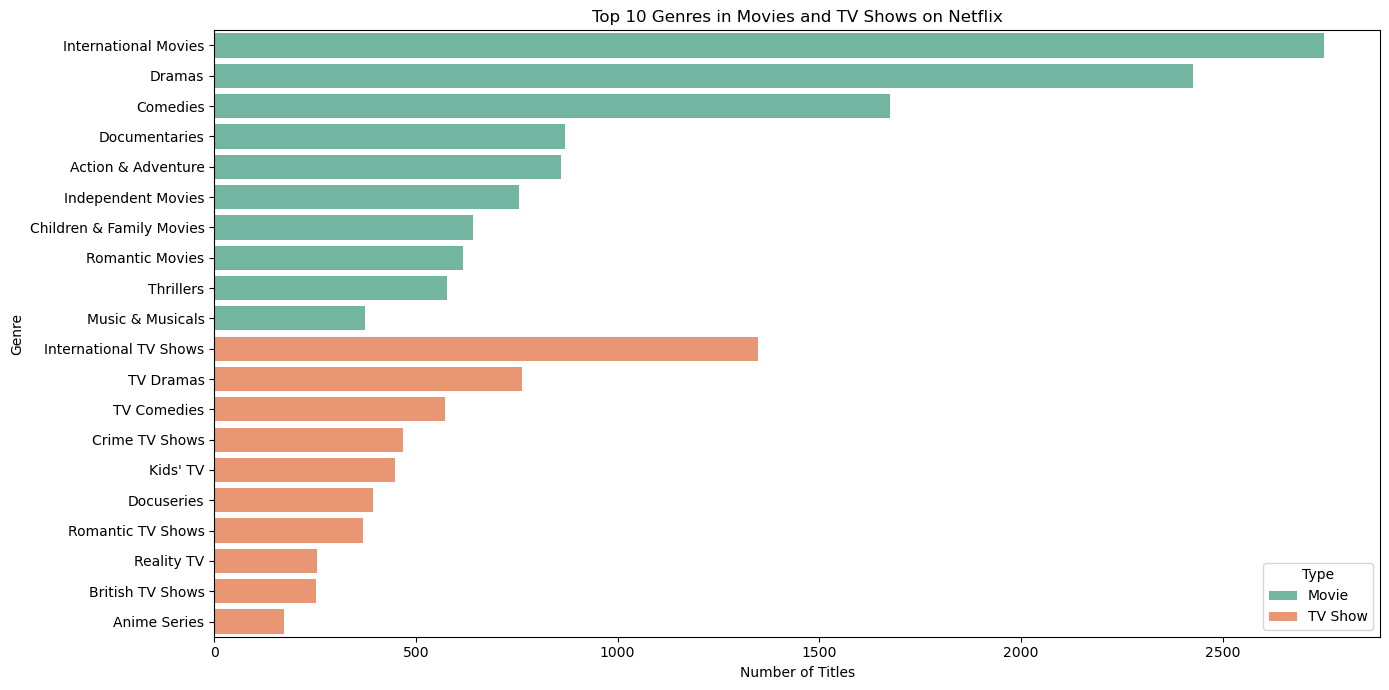

In [16]:
db['listed_in'] = db['listed_in'].replace('Not Given', pd.NA)

# Drop missing genre or type entries
genre_data = db.dropna(subset=['listed_in', 'type'])

# Split and explode genres
genre_data.loc[:, 'listed_in'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('listed_in')

# Function to get top 10 genres for a given type
def get_top_genres(data, content_type):
    genre_counts = (
        data[data['type'] == content_type]['listed_in']
        .value_counts()
        .head(10)
        .reset_index()
    )
    genre_counts.columns = ['genre', 'count']  # Ensure proper naming
    genre_counts['type'] = content_type
    return genre_counts

# Get top 10 genres for both Movies and TV Shows
top_movie_genres = get_top_genres(genre_data, 'Movie')
top_tv_genres = get_top_genres(genre_data, 'TV Show')

# Combine into one DataFrame
top_genres_by_type = pd.concat([top_movie_genres, top_tv_genres], ignore_index=True)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=top_genres_by_type, x='count', y='genre', hue='type', palette='Set2')

plt.title('Top 10 Genres in Movies and TV Shows on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# Conclusion of Netflix Content Analysis

This exploratory data analysis of the Netflix content library reveals several key insights into the platform's offerings, content acquisition trends, and audience targeting.

## Content Distribution and Focus:
* **Dominance of Movies**: Movies constitute the majority of Netflix's catalog, accounting for approximately 69.7% of all titles, significantly outnumbering TV shows which make up 30.3%. This indicates a primary focus on film content.
* **Leading Content Contributors**: The United States is by far the largest contributor to Netflix's content, accounting for 3240 titles, followed by India, the United Kingdom, Canada, and France. This highlights Netflix's strong presence and content partnerships in these regions.

## Content Growth and Release Patterns:
* **Recent Content Surge**: There has been a notable increase in content additions, particularly for movies, around 2017-2018, with a slight tapering in 2020-2021. This suggests a period of aggressive content expansion.
* **Consistent Monthly Additions**: Content is added fairly consistently throughout the year, with a slight peak in July for movies and a more even distribution for TV shows. This consistent release schedule helps maintain subscriber engagement.

## Audience and Genre Preferences:
* **Prevalent Ratings**: "TV-MA" (3205 titles) and "TV-14" are the most frequent ratings, suggesting a significant portion of Netflix's content is geared towards mature and teen audiences. For movies, "TV-MA" and "R" are prominent, while for TV shows, "TV-MA" and "TV-14" lead.
* **Evolving Rating Trends**: Over the years (especially post-2000), there has been a fluctuating but generally high volume of "TV-MA" and "TV-14" content, indicating a sustained focus on these demographic segments.
* **Popular Genres**: "Dramas" and "Comedies" are the most common genres overall. When split by content type, "Dramas" and "International Movies" dominate the movie category, while "Dramas," "International TV Shows," and "Crime TV Shows" are highly prevalent among TV shows. This suggests a global appeal for dramatic and international content.

## Key Directors:
* The analysis identified specific directors who have contributed multiple titles to the platform, with Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas appearing among the top 10. This indicates recurring collaborations or acquisitions from these creators.

In summary, Netflix's content strategy appears to prioritize a high volume of movie releases, with a strong emphasis on international and mature-audience-oriented dramas and comedies, largely driven by contributions from the United States and other major content-producing countries. The platform maintains a steady influx of new titles throughout the year, catering to a diverse but clearly segmented audience base.